In [1]:
# Importar as libs que vamos usar
import pandas as pd

In [3]:
# Carregar o dataset de dados da Netflix
df_netflix = pd.read_csv('./datasets/netflix_daily_top_10.csv')

# Dessa base, analise e extraia:

- Tipos de dados disponíveis
- Período da análise feita
- Tamanho da base de dados
- Verificar dados nulos
- Outliers

In [4]:
# Vamos analisar o que temos nesta base
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


- Em uma primeiro momento os dados estão completos, sendo necessário padronizar as colunas, e acertar os missing values para Netflix Exclusive, que é bem capaz que só falte marcar a negativa
- Ainda é cedo para falar das tipagens, vamos precisar analisar melhor, para ver se precisamos transformar mais os dados

In [6]:
# Para facilitar, já vamos normalizar as colunas
df_netflix.rename(
  columns={
    'As of': 'period', 
    'Rank': 'rank', 
    'Year to Date Rank': 'ytd_rank',
    'Last Week Rank': 'last_week_rank',
    'Title': 'title',
    'Type': 'type',
    'Netflix Exclusive': 'netflix_exclusive',
    'Netflix Release Date': 'netflix_release_date',
    'Days In Top 10': 'days_in_top_10',
    'Viewership Score': 'viewers_score',
  }, inplace=True)


In [7]:
# Vamos ver algumas linhas
df_netflix.head(10)

,period,rank,ytd_rank,last_week_rank,title,type,netflix_exclusive,netflix_release_date,days_in_top_10,viewers_score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,"Mar 27, 2020",4,15


In [8]:
# Vamos responder a primeira pergunta, quais tipos de dados nós temos?
df_netflix.dtypes

period                  object
rank                     int64
ytd_rank                object
last_week_rank          object
title                   object
type                    object
netflix_exclusive       object
netflix_release_date    object
days_in_top_10           int64
viewers_score            int64
dtype: object

In [10]:
# Uma visão generalista da base
df_netflix.describe()

,rank,days_in_top_10,viewers_score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


In [13]:
# Agora vamos para o Período da análise feita

# Mas antes, vamos ajustar os tipos de dados para facilitar nossa análise
df_netflix['period'] = pd.to_datetime(df_netflix['period'])
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   period                7100 non-null   datetime64[ns]
 1   rank                  7100 non-null   int64         
 2   ytd_rank              7100 non-null   object        
 3   last_week_rank        7100 non-null   object        
 4   title                 7100 non-null   object        
 5   type                  7100 non-null   object        
 6   netflix_exclusive     4599 non-null   object        
 7   netflix_release_date  7100 non-null   object        
 8   days_in_top_10        7100 non-null   int64         
 9   viewers_score         7100 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 554.8+ KB


In [16]:
# Agora vamos pegar a primeira e última data da análise
start_date = df_netflix['period'].min()
end_date = df_netflix['period'].max()
print("O período da análise é de {} a {}".format(start_date, end_date))


O período da análise é de 2020-04-01 00:00:00 a 2022-03-11 00:00:00


In [19]:
# Vamos responder o tamanho da base de dados
df_netflix.shape
print("Temos {} linhas e {} colunas".format(df_netflix.shape[0], df_netflix.shape[1]))

Temos 7100 linhas e 10 colunas


In [20]:
# Agora vamos analisar os dados nulos
df_netflix.isnull().sum()

period                     0
rank                       0
ytd_rank                   0
last_week_rank             0
title                      0
type                       0
netflix_exclusive       2501
netflix_release_date       0
days_in_top_10             0
viewers_score              0
dtype: int64

In [21]:
df_netflix['netflix_exclusive'].unique()

array(['Yes', nan], dtype=object)

- Temos missing values apenas em Netflix Exclusive
- Total de 2501 registros
- Sendo que ou o valor é Yes, ou `NaN`, o que implica que só precisamos preencher os missing values com 'No', ou até normalizar o Yes/No para 0/1
- Isto indica que não faltam dados de valor, só mesmo um preenchimento dos títulos que não são Netflix Exclusive

rank                 Axes(0.125,0.11;0.227941x0.77)
days_in_top_10    Axes(0.398529,0.11;0.227941x0.77)
viewers_score     Axes(0.672059,0.11;0.227941x0.77)
dtype: object

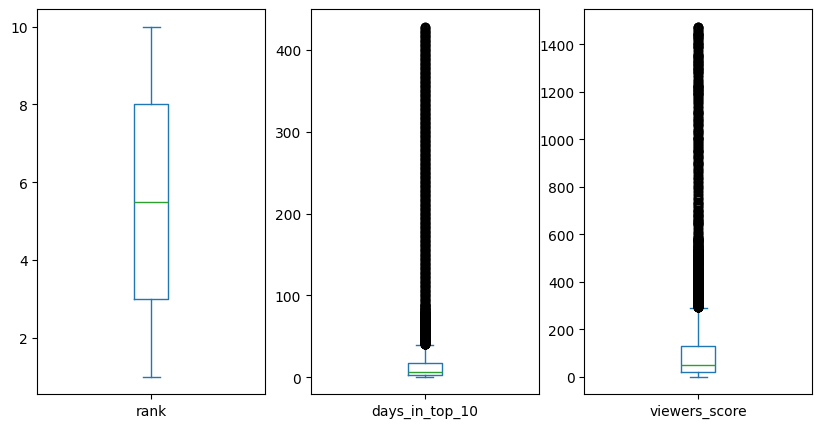

In [25]:
# Por último vamos avaliar os outliers, a melhor maneira é plotar isso graficamente.
# Usando apenas as variáveis numéricas
df_netflix.plot(kind='box', figsize=(10, 5), column=['rank', 'days_in_top_10', 'viewers_score'], subplots=True)


- Temos outliers apenas nas colunas de Days in Top 10 e Viewers Score, e são muitos
- Nada de outliers na coluna Rank, que a gente já tinha visto que a média e mediana eram muito parecidas mesmo, não indicando nada.

In [26]:
# Vamos analisar um pouco melhor o caso do Days in Top 10
# Temos muitos dados acima de 100 dias, vale ver estes dados para entender se algo chama a atenção

df_netflix[df_netflix['days_in_top_10'] > 100].head(10)

,period,rank,ytd_rank,last_week_rank,title,type,netflix_exclusive,netflix_release_date,days_in_top_10,viewers_score
2896,2021-01-15,7,7,10,Cocomelon,TV Show,NaN,"Jun 1, 2020",101,291
2909,2021-01-16,10,7,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",102,292
2919,2021-01-17,10,10,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",103,293
3019,2021-01-27,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",104,294
3029,2021-01-28,10,10,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",105,295
3038,2021-01-29,9,10,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",106,297
3078,2021-02-02,9,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",107,299
3087,2021-02-03,8,9,10,Cocomelon,TV Show,NaN,"Jun 1, 2020",108,302
3098,2021-02-04,9,8,10,Cocomelon,TV Show,NaN,"Jun 1, 2020",109,304
3104,2021-02-05,5,9,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",110,310


In [29]:
# Agora para o Viewer Score
df_netflix[df_netflix['viewers_score'] > 500].head(10)

,period,rank,ytd_rank,last_week_rank,title,type,netflix_exclusive,netflix_release_date,days_in_top_10,viewers_score
3664,2021-04-02,5,7,4,Cocomelon,TV Show,NaN,"Jun 1, 2020",162,506
3678,2021-04-03,9,5,3,Cocomelon,TV Show,NaN,"Jun 1, 2020",163,508
3688,2021-04-04,9,9,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",164,510
3707,2021-04-06,8,-,7,Cocomelon,TV Show,NaN,"Jun 1, 2020",165,513
3719,2021-04-07,10,8,7,Cocomelon,TV Show,NaN,"Jun 1, 2020",166,514
3726,2021-04-08,7,10,7,Cocomelon,TV Show,NaN,"Jun 1, 2020",167,518
3734,2021-04-09,5,7,5,Cocomelon,TV Show,NaN,"Jun 1, 2020",168,524
3745,2021-04-10,6,5,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",169,529
3756,2021-04-11,7,6,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",170,533
3766,2021-04-12,7,7,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",171,537
